<a href="https://colab.research.google.com/github/NHagar/cc-genealogy/blob/main/analysis/cc_genalogy_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets and Paths

In [ ]:
from pathlib import Path
query_path = Path("queries/domains")

paths = {
    "c4_en": ("hf://datasets/allenai/c4/en/*.json.gz", query_path / "c4_en.sql"),
    "c4_en_noblock": (
        "hf://datasets/allenai/c4/en.noblocklist/*.json.gz",
        query_path / "c4_en_noblocklist.sql",
    ),
    "c4_multilingual": (
        "hf://datasets/allenai/c4/multilingual/*.json.gz",
        query_path / "c4_multilingual.sql",
    ),
    "c4_news": (
        "hf://datasets/allenai/c4/realnewslike/*.json.gz",
        query_path / "c4_realnewslike.sql",
    ),
    "cultura": (
        "hf://datasets/uonlp/CulturaX/*/*.parquet",
        query_path / "culturax.sql",
    ),
    "falcon": (
        "hf://datasets/tiiuae/falcon-refinedweb/data/*.parquet",
        query_path / "falcon_refinedweb.sql",
    ),
    "fineweb": (
        "hf://datasets/HuggingFaceFW/fineweb/data/*/*.parquet",
        query_path / "fineweb.sql",
    ),
    "fineweb_edu": (
        "hf://datasets/HuggingFaceFW/fineweb-edu/data/*/*.parquet",
        query_path / "fineweb_edu.sql",
    ),
    "madlad_cleaned": (
        "hf://datasets/allenai/MADLAD-400/data-v1p5/*/clean*.jsonl.gz",
        query_path / "madlad_400_cleaned.sql",
    ),
    "madlad_noisy": (
        "hf://datasets/allenai/MADLAD-400/data-v1p5/*/noisy*.jsonl.gz",
        query_path / "madlad_400_raw.sql",
    ),
    "zyda_2": (
        "hf://datasets/Zyphra/Zyda-2/data/**/*.parquet",
        query_path / "zyda_2.sql",
    ),
    "dclm": (
        "hf://datasets/mlfoundations/dclm-baseline-1.0-parquet/filtered/**/*.parquet",
        query_path / "dclm_baseline.sql",
    ),
}

In [ ]:
list(paths.keys())

['c4_en',
 'c4_en_noblock',
 'c4_multilingual',
 'c4_news',
 'cultura',
 'falcon',
 'fineweb',
 'fineweb_edu',
 'madlad_cleaned',
 'madlad_noisy',
 'zyda_2',
 'dclm']

# Simple Graph

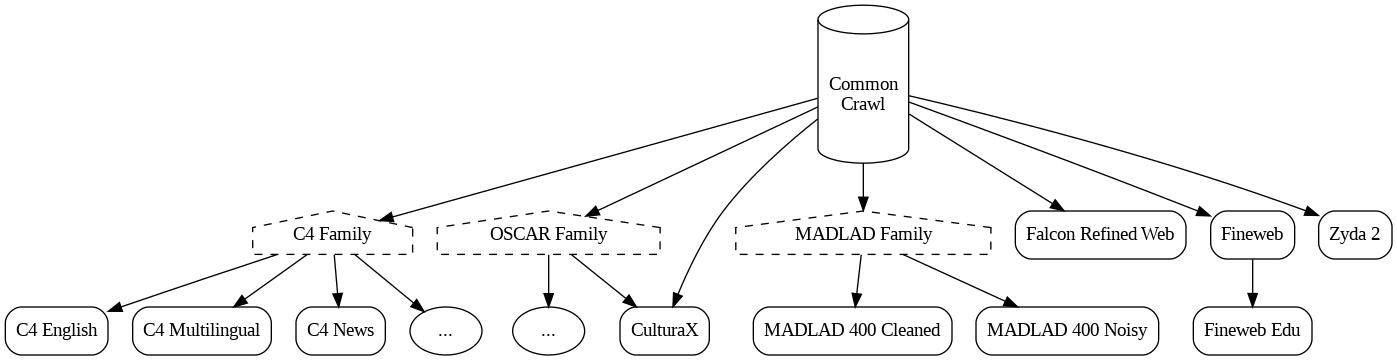

In [52]:
from graphviz import Digraph
from IPython.display import Image

# blank directed graph
dot = Digraph(comment='Common Crawl Tree')
dot.attr(rankdir='TB')  # TB for top to bottom, LR for left to right

# nodes
dot.node('common-crawl', '\n\nCommon\nCrawl\n\n', shape='cylinder')
dot.node('c4-family', 'C4 Family',
         shape='house',
         style='dashed')
dot.node('oscar-family', 'OSCAR Family',
         shape='house',
         style='dashed')
dot.node('madlad-family', 'MADLAD Family',
         shape='house',
         style='dashed')

dot.node('c4-en', 'C4 English', shape='box', style='rounded')
dot.node('c4-multilingual', 'C4 Multilingual', shape='box', style='rounded')
dot.node('c4-news', 'C4 News', shape='box', style='rounded')
dot.node('c4-other', '...')

dot.node('madlad-cleaned', 'MADLAD 400 Cleaned', shape='box', style='rounded')
dot.node('madlad-noisy', 'MADLAD 400 Noisy', shape='box', style='rounded')

dot.node('cultura', 'CulturaX', shape='box', style='rounded')
dot.node('falcon', 'Falcon Refined Web', shape='box', style='rounded')
dot.node('fineweb', 'Fineweb', shape='box', style='rounded')
dot.node('fineweb-edu', 'Fineweb Edu', shape='box', style='rounded')

dot.node('zyda-2', 'Zyda 2', shape='box', style='rounded')


dot.node('oscar-other','...')
#dot.node('dclm', 'DCLM Baseline')

# edges
dot.edge('common-crawl', 'oscar-family')
dot.edge('oscar-family', 'cultura')
dot.edge('oscar-family','oscar-other')
dot.edge('common-crawl', 'c4-family',
         #penwidth='2.5',
         #style="dashed",
         #label='0.8'
         )
dot.edge('common-crawl', 'cultura')#, label='0.8')
dot.edge('common-crawl', 'falcon')#, label='0.8')
dot.edge('common-crawl', 'fineweb')#, label='0.8')
dot.edge('fineweb', 'fineweb-edu')#, label='0.8')
dot.edge('common-crawl', 'madlad-family')#, label='0.8')
dot.edge('madlad-family', 'madlad-cleaned')#, label='0.8')
dot.edge('madlad-family', 'madlad-noisy')#, label='0.8')
dot.edge('common-crawl', 'zyda-2')#, label='0.8')
#dot.edge('common-crawl', 'dclm')#, label='0.8')
dot.edge('c4-family', 'c4-en')#, label='0.8')
dot.edge('c4-family', 'c4-multilingual')#, label='0.8')
dot.edge('c4-family', 'c4-news')#, label='0.8')
dot.edge('c4-family', 'c4-other')#, label='0.8')


# view the graph
#dot.render('common_crawl_tree', format='pdf', view=True)
#Image(dot.pipe(format='png'))
Image(dot.pipe(format='png'))
# resize image to 5x10
#Image(dot.pipe(format='png'), width=600, height=300)

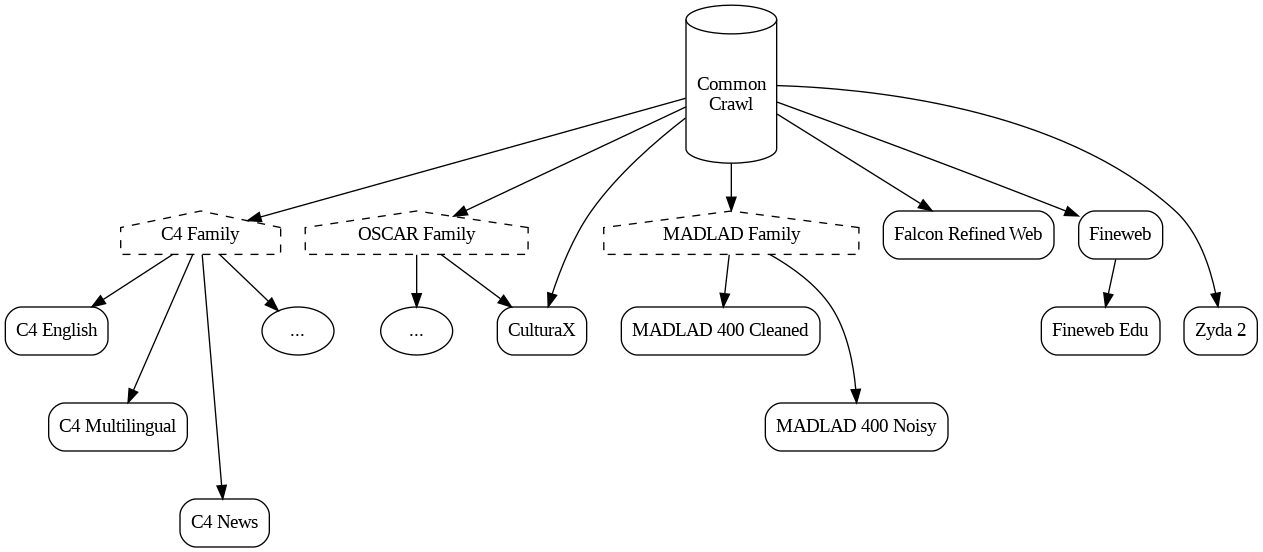

In [55]:
u = dot.unflatten(stagger=3)
u.render('common_crawl_tree', format='pdf', view=True)
Image(u.pipe(format='png'))